In [1]:
# set up
import pandas as pd
import numpy as np
import pickle
import time 
import os
import matplotlib.pyplot as plt
import datetime
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.font_manager import FontProperties
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use("ggplot")
data_folder_path = 'C:\\Users\\goodluck\\Desktop\\DB'
raw_data_path =  "C:\\Users\\goodluck\\Desktop\\DB\\raw_data"
storage_path =  "C:\\Users\\goodluck\\Desktop\\DB\\database_storage"
DTBS_path = os.path.join(storage_path, "DTBS.pkl")
font = FontProperties(fname=r"simsun.ttf", size=14)  
matplotlib.rcParams['axes.unicode_minus'] =False
mpl.rcParams['font.sans-serif'] = ['SimHei']
tick_spacing = 4

# re-open
with open(DTBS_path, 'rb') as f:  
    DTBS = pickle.load(f)
    
# helper -- days
def select_days(s_d, e_d, wkd, gap):
    days = []
    flag = 0
    sdt = datetime.datetime.strptime(s_d, '%Y-%m-%d').date()
    edt = datetime.datetime.strptime(e_d, '%Y-%m-%d').date()
    for day in DTBS['D']['day']:
        cdt =  datetime.datetime.strptime(day, '%Y-%m-%d').date()
        if cdt >= sdt:
            flag = 1
        
        if cdt == edt:
            days.append(day)
            break
        
        if cdt > edt:
            break 
            
        if flag == 1:
            days.append(day)
            
    s_days = []
    count = 0
    for day in days:
        if day in DTBS['D'][wkd]:
            if count % gap == 0:
                s_days.append(day)
                
            count += 1
    
    
    return s_days

f20wm = select_days('2020-01-01', '2020-06-30', 'mon', 1)
f20fm = select_days('2020-01-01', '2020-06-30', 'mon', 2)
f20mm = select_days('2020-01-01', '2020-06-30', 'mon', 4)
s20wm = select_days('2020-07-01', '2020-12-31', 'mon', 1)
s20fm = select_days('2020-07-01', '2020-12-31', 'mon', 2)
s20mm = select_days('2020-07-01', '2020-12-31', 'mon', 4)
f21wm = select_days('2021-01-01', '2021-06-30', 'mon', 1)
f21fm = select_days('2021-01-01', '2021-06-30', 'mon', 2)
f21mm = select_days('2021-01-01', '2021-06-30', 'mon', 4)
s21wm = select_days('2021-07-01', '2021-12-31', 'mon', 1)
s21fm = select_days('2021-07-01', '2021-12-31', 'mon', 2)
s21mm = select_days('2021-07-01', '2021-12-31', 'mon', 4)
f22wm = select_days('2022-01-01', '2022-06-30', 'mon', 1)
f22fm = select_days('2022-01-01', '2022-06-30', 'mon', 2)
f22mm = select_days('2022-01-01', '2022-06-30', 'mon', 4)
s22wm = select_days('2022-07-01', '2022-12-31', 'mon', 1)
s22ww = select_days('2022-07-01', '2022-12-31', 'wed', 1)
s22fm = select_days('2022-07-01', '2022-12-31', 'mon', 2)
s22mm = select_days('2022-07-01', '2022-12-31', 'mon', 4)
f23wm = select_days('2023-01-01', '2023-04-17', 'mon', 1)
f23fm = select_days('2023-01-01', '2023-04-17', 'mon', 2)
f23mm = select_days('2023-01-01', '2023-04-17', 'mon', 4)
f23ww = select_days('2023-01-01', '2023-04-19', 'wed', 1)
f23mm.append('2023-04-10')
a20wm = select_days('2020-01-01', '2020-12-31', 'mon', 1)
a20fm = select_days('2020-01-01', '2020-12-31', 'mon', 2)
a20mm = select_days('2020-01-01', '2020-12-31', 'mon', 4)
a21wm = select_days('2021-01-01', '2021-12-31', 'mon', 1)
a21fm = select_days('2021-01-01', '2021-12-31', 'mon', 2)
a21mm = select_days('2021-01-01', '2021-12-31', 'mon', 4)
a22wm = select_days('2022-01-01', '2022-12-31', 'mon', 1)
a22fm = select_days('2022-01-01', '2022-12-31', 'mon', 2)
a22mm = select_days('2022-01-01', '2022-12-31', 'mon', 4)

a22wm = select_days('2022-01-01', '2022-12-31', 'mon', 1)
a22wt = select_days('2022-01-01', '2022-12-31', 'tue', 1)
a22ww = select_days('2022-01-01', '2022-12-31', 'wed', 1)
a22wh = select_days('2022-01-01', '2022-12-31', 'thu', 1)
a22wf = select_days('2022-01-01', '2022-12-31', 'fri', 1)



hywm = [f20wm, s20wm, f21wm, s21wm, f22wm, s22ww, f23ww]
hyfm = [f20fm, s20fm, f21fm, s21fm, f22fm, s22fm, f23fm]
hymm = [f20mm, s20mm, f21mm, s21mm, f22mm, s22mm, f23mm]
test = ['2023-04-12','2023-04-19']

# helper -- others

def sharpe(profit):
    avg_rate = np.mean(profit)
    std_rate = np.std(profit)
    Sharpe_Ratio = (avg_rate * 52 -0.028397) / (std_rate * sqrt(52))
    return(Sharpe_Ratio)


def down(profit):
    return_list = [i+1 for i in profit]
    i = np.argmax((np.maximum.accumulate(return_list) - return_list))
    if i == 0:
        return 0
    j = np.argmax(return_list[:i])  # 开始位置
    drawdown_rate = (return_list[j] - return_list[i]) / return_list[j]
    return drawdown_rate


def vola(profit):
    log_return_list = [log(i+1) for i in profit]
    Volatility = std(log_return_list) / sqrt(5)
    annualVolatility = Volatility * sqrt(252) 
    return annualVolatility


def select_group(nm, dt, codes, grp):
    select = []
    if nm == 'id':
        for code in codes:
            if DTBS['B'][code]['cat1'] == grp:
                select.append(code)
    elif nm == 'pr':
        for code in codes:
            if DTBS['A'][code][dt]['dp'] >= grp[0] and DTBS['A'][code][dt]['dp'] <= grp[1]:
                select.append(code)
                
    else:
        for code in codes:
            if DTBS['B'][code]['cat1']  == grp[0]:
                if DTBS['A'][code][dt]['dp'] >= grp[1][0] and DTBS['A'][code][dt]['dp'] <= grp[1][1]:
                    select.append(code)
    return select


def transform_group(grps):
    if len(grps) == 1:
        return grps[0]
    else:
        grp = ['idpr', []]
        for cd1 in grps[0][1]:
            for cd2 in grps[1][1]:
                grp[1].append((cd1, cd2))
        
        return grp
    
def ipo(codes, dt):
    exist = []
    for code in codes:
        if datetime.datetime.strptime(DTBS['B'][code]['ipo'], '%Y-%m-%d') >= (datetime.datetime.strptime(dt, '%Y-%m-%d') + datetime.timedelta(days=-180)):
            exist.append(code)
             
    return exist
    
def select_existing(dt):
    exist = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
            exist.append(code)
            
    return exist

def get_prcs(code, dts):
    prc = []
    for dt in dts:
        prc.append(DTBS['A'][code][dt]['dp'])
    prc.sort()
    return prc
    
def relative_low(lst, pos):
    return np.quantile(a=lst, q = pos)
    
def absolute_low(lst, pos):
    return min(lst) + pos * (max(lst) - min(lst))

def low_prc(code, dt, lm, pos):
    prc = get_prcs(code, lm)
#     lp = min([relative_low(prc, pos), absolute_low(prc, pos)])
    lp = absolute_low(prc, pos)
    tp = DTBS['A'][code][dt]['dp']
#     if (tp <= lp):
#         print(code, tp, lp)
#     if tp <= lp:
#         print(tp, lp)
    return tp <= lp

def calculate_time(dt, d, l):
    time = []
    days = DTBS['D']['day']
    if d == 'p':
        for i in range(len(days)):
            if days[i] == dt:
                break
                
    return days[i-l+1:i+1]
            
def select_condition(codes, dt, fcd):
    satisfy = []
    if fcd[0] == 'lp':
        lm = calculate_time(dt, 'p', 20)
        
        for code in codes:
            if low_prc(code, dt, lm, fcd[1]):
                satisfy.append(code)
    elif len(fcd) == 1:
        return ipo(codes, dt)
        
    else:
        for code in codes:
            if DTBS['A'][code][dt][fcd[0]] <= fcd[2] and DTBS['A'][code][dt][fcd[0]] >= fcd[1]:
                satisfy.append(code)
                    
    return satisfy

def takeSecond(elem):
    return elem[1]


def retrieve_low_nodes(codes,dt,num):
    dl_rank = []
    for code in codes:
        if DTBS['A'][code][dt]['dl'] != 999:
            dl_rank.append((code, DTBS['A'][code][dt]['dl']))
    
    dl_rank.sort(key=takeSecond)
    low = dl_rank[0:num]
    return [i[0] for i in low]

def rank(codes, dt, idx, num, d):
    rk = []
    if num == -1:
        num = len(codes)
    for code in codes:
        if idx == 'lp':
            if not np.isnan(DTBS['A'][code][dt]['dp']):
                lm = calculate_time(dt, 'p', 20)
                prc = get_prcs(code, lm)
                lp = absolute_low(prc, 0)
                rk.append((code, DTBS['A'][code][dt]['dp']/lp))
            
            
        elif idx != 'dl':
            if not np.isnan(DTBS['A'][code][dt][idx]):
                rk.append((code, DTBS['A'][code][dt][idx]))
        else:
            if not np.isnan(DTBS['A'][code][dt][idx]):
                if DTBS['A'][code][dt][idx] != 999:
                    rk.append((code, DTBS['A'][code][dt][idx]))
    if num >= len(rk):
        num = len(rk)
        
     
#     reverse = True 降序
    if d == 'd':
        rk.sort(key=takeSecond, reverse = True)
    else:
        rk.sort(key=takeSecond, reverse = False)

    if idx == 'lp':
        lp = [i for i in rk if i[1] == 1.0]
        ot = []
        if num - len(lp) > 0:
            ot = rk[len(lp):num]
        
        low = lp + ot
        
    else:    
        low = rk[0:num]
#     print("In",dt , len(low), "of", len(codes),  "is selected")   

#     print(low)
    
    
    return [i[0] for i in low]
        
    
idts = [['农林牧渔(2021)', '基础化工(2021)', '美容护理(2021)', '通信(2021)', '非银金融(2021)', '电力设备(2021)', '汽车(2021)', '电子(2021)'], ['家用电器(2021)', '基础化工(2021)', '建筑材料(2021)', '建筑装饰(2021)', '机械设备(2021)', '商贸零售(2021)', '计算机(2021)', '国防军工(2021)', '钢铁(2021)', '传媒(2021)'], ['汽车(2021)', '交通运输(2021)', '农林牧渔(2021)', '煤炭(2021)', '有色金属(2021)', '商贸零售(2021)', '机械设备(2021)', '钢铁(2021)', '电力设备(2021)', '基础化工(2021)'], ['电力设备(2021)', '有色金属(2021)', '交通运输(2021)', '钢铁(2021)', '通信(2021)', '汽车(2021)', '基础化工(2021)', '轻工制造(2021)', '国防军工(2021)', '医药生物(2021)'], ['有色金属(2021)', '机械社保(2021)', '基础化工(2021)', '农林牧渔(2021)', '汽车(2021)', '交通运输(2021)', '国防军工(2021)', '医药生物(2021)', '通信(2021)', '电力设备(2021)'], ['有色金属(2021)', '农林牧渔(2021)', '汽车(2021)', '电力设备(2021)', '公用事业(2021)', '社会服务(2021)', '食品饮料(2021)', '医药生物(2021)', '轻工制造(2021)', '建筑材料(2021)'], ['建筑材料(2021)', '建筑装饰(2021)', '国防军工(2021)', '计算机(2021)', '通信(2021)', '食品饮料(2021)', '社会服务(2021)', '纺织服饰(2021)', '交通运输(2021)', '轻工制造(2021)']]

# plot

def plot_profit(days, profit, mk_one, market = DTBS['C'], tt = '收益率'):
    plt.figure(figsize=(80,60))
    

        
    fig, ax = plt.subplots(1,1)
#     plt.plot(days[1:], one_profit, linestyle='dashdot',label='价格110-130+50%低价+市值<3+转股溢价率<50:低价前5')
    plt.plot(days[1:], profit, linestyle='dashdot',label='策略收益率')
    
    i_x = [days[1], days[-1]]

#     market_gain = (market['zi'][days[-1]]-market['zi'][days[0]])/(market['zi'][days[0]])
#     i_y = [0, market_gain]
#     plt.plot(i_x, i_y, linestyle='solid',label='中正转债指数')
    plt.plot(days[1:], mk_one, linestyle='solid',label='中证转债指数')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.ylabel('Increase per year/%')

    # 'dashed'
    #‘dotted'
    # 'dashdot'
    # 'solid'

    
    plt.legend(fontsize = 'x-small')

    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#     plt.ylabel('收益率/%')
    plt.ylabel("increase per year/%")
#     tt = '收益率'
    plt.title(tt)
    plt.savefig(tt, dpi=300)
#     plt.show()
#     print("Final gain", profit[-1], ',',"Market gain", market_gain)

# statistics

def win_stat(res, mk):
    print("Max profit", max(res), ", Max loss", min(res))
    wins = []
    win = 0
    count = 0
    winm = 0
    winsm  = []
    summ = 0
    mksum = 0    
    for i in range(len(res)):
        if res[i] >= mk[i]:
            win += 1
            wins.append(True)
        else:
            wins.append(False)
        
        summ += res[i]
        mksum += mk[i]
        if (count + 1) % 4 == 0:
            if summ >= mksum:
                winm += 1
                winsm.append(True)
            else:
                winsm.append(False)
                
            summ = 0
            mksum = 0
            
        count += 1
    win_rate = win/len(res)
    winm_rate = winm/len(winsm)
    print("Weekly win rate & details", win_rate, ", ", wins)
    print("Monthly win rate & details", winm_rate,", ", winsm)

# calculate
def cumulative_profit(days, grp_cd, flt_cd, rk_cd):
    cm_profit = []
    one_profit = []
    all_select = []
    sum_profit = 0
    lock = False
    for i in range(len(days)): 
        if i+1 == len(days):
            exist = select_existing(days[i])
            
            
        else: 
            exist_tr = select_existing(days[i])
            exist_nr = select_existing(days[i+1])
            exist =list(set(exist_tr).intersection(set(exist_nr)))

        select = exist.copy()
        candidate = []
        if grp_cd != []:
            grp = transform_group(grp_cd)
            for cd in grp[1]:
                select = exist.copy()
                select = select_group(grp[0], days[i], select, cd)
                for fcd in flt_cd:
                    select = select_condition(select, days[i], fcd)
                for rk in rk_cd:
                    select = rank(select, days[i], rk[0], rk[1], rk[2])                  
                for cd in select:
                    candidate.append(cd)
                    
                
                            

        
        else: 
            for fcd in flt_cd:
                select = select_condition(select, days[i], fcd)
            for rk in rk_cd:
                select = rank(select, days[i], rk[0], rk[1], rk[2])    
#             if dl > 0:
#                 select = retrieve_low_nodes(select, days[i], dl)
                
            candidate = select.copy()    
        
        if avoid(days[i]) <-3.68:
            lock = True
            
        if lock == True and avoid(days[i]) >- 2.9:
            lock = False
            
        if lock == True:
            candidate = []
#         print(days[i], len(candidate))
        all_select.append(candidate)
#         print(days[i], candidate)
        
#         dl = []
#         for cd in candidate:
#             dl.append(DTBS['A'][cd][days[i]]['dl'])
#         for cd in candidate:
#             dl.append(DTBS['A'][cd][days[i]]['dp'])
            
#         for cd in candidate:
#             dl.append(DTBS['A'][cd][days[i]]['bl'])
#         print(days[i], candidate, dl)
        dl = []
        if i >= 1:
        
            tr = 0
            lr = 0
#
            for cd in all_select[i-1]:
                tr += DTBS['A'][cd][days[i]]['dp']
                lr += DTBS['A'][cd][days[i-1]]['dp']
            if len(all_select[i-1]) == 0:
                profit = 0
                print("short position in", days[i-1])
            else:
                profit = ((tr - lr)/ lr)
            one_profit.append(profit)

            sum_profit += profit

                
            cm_profit.append(sum_profit)


    return cm_profit, one_profit    


def avoid(dt):
    return False
    c = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
#             if DTBS['A'][code][dt]['dp'] >= 120 and DTBS['A'][code][dt]['dp'] <= 130:
            if DTBS['A'][code][dt]['pd'] >= -20 and  DTBS['A'][code][dt]['pd'] <= 20:
                if not np.isnan(DTBS['A'][code][dt]['ytm']):
                    c.append(DTBS['A'][code][dt]['ytm'] )
#                 c.append(DTBS['A'][code][dt]['cpr'] + DTBS['A'][code][dt]['dp'])
                
    m = np.mean(c)
    
#     return m < -4

    return m

    
    

In [38]:
f10t5p = select_days('2022-10-01', '2023-05-20', 'fri', 1)
f10t5r = []
days = DTBS['D']['day']
idx = days.index('2022-10-14') 
for i in range(1,len(f10t5p)):
    id1 = days.index(f10t5p[i-1]) 
    id2 = days.index(f10t5p[i])
    f10t5r.append(days[id1+1:id2+1])
    
yqq = ['能源',
 '制造',
 '投资',
 '新能源',
 '基建',
 '医药',
 '电子',
 '环保',
 '消费',
 '农业',
 '科技',
 '金融']

yqq = ['科技',
 '医药',
 '电子']

yqq = ['医药']

# for q in yqq:
#     print(q)
#     for i in range(1,len(f10t5p)-2):
#         twtrta = []
#         nwtrta = []
#         trtcra = []
#         twpfa = []
#         nwpfa = []
#         nnwpfa = []
#         count = 0
#         for cd in DTBS['A'].keys():

#             if DTBS['B'][cd].__contains__('yqq') and DTBS['B'][cd]['yqq'] == q and DTBS['A'][cd][f10t5p[i-1]]['ia'] == 1 and  DTBS['A'][cd][f10t5p[i]]['ia'] == 1 and  DTBS['A'][cd][f10t5p[i+1]]['ia'] == 1 and DTBS['A'][cd][f10t5p[i+2]]['ia'] == 1:
#                 count += 1
#                 twtrt = 0
#                 nwtrt = 0
#                 twpf = DTBS['A'][cd][f10t5p[i]]['dp']/DTBS['A'][cd][f10t5p[i-1]]['dp'] - 1 
#                 nwpf = DTBS['A'][cd][f10t5p[i+1]]['dp']/DTBS['A'][cd][f10t5p[i]]['dp'] - 1
#                 nnwpf = DTBS['A'][cd][f10t5p[i+2]]['dp']/DTBS['A'][cd][f10t5p[i+1]]['dp'] - 1
#                 for d in f10t5r[i-1]:
#                     twtrt += DTBS['A'][cd][d]['trt']
                    
#                 twtrt /= len(f10t5r[i-1])
                    
                
#                 for d in f10t5r[i]:
#                     nwtrt += DTBS['A'][cd][d]['trt']
                    
#                 nwtrt /= len(f10t5r[i])    
                
#                 trtcr = nwtrt/twtrt - 1
                
                
                
#                 twtrta.append(twtrt)
#                 nwtrta.append(nwtrt)
#                 trtcra.append(trtcr)
#                 twpfa.append(twpf)
#                 nwpfa.append(nwpf)
#                 nnwpfa.append(nnwpf)
                
#         print(f10t5p[i])
#         print('数量',count)
#         print('上周换手率', np.mean(twtrta))
#         print('本周换手率',np.mean(nwtrta))               
#         print('换手率变化',np.mean(trtcra))
#         print('上周收益', np.mean(twpfa))          
        
#         print('本周收益', np.mean(nwpfa))  
#         print('下周收益', np.mean(nnwpfa))          
for q in yqq:
    print(q)
    x = []
    y1 = []
    y2 = []
    for i in range(1,len(f10t5p)):
        twtrta = []
        twpfa = []
        count = 0
        
        for cd in DTBS['A'].keys():

            if DTBS['B'][cd].__contains__('yqq') and DTBS['B'][cd]['yqq'] == q and DTBS['A'][cd][f10t5p[i-1]]['ia'] == 1 and  DTBS['A'][cd][f10t5p[i]]['ia'] == 1:
                count += 1
                twtrt = 0
                twpf = DTBS['A'][cd][f10t5p[i]]['dp']/DTBS['A'][cd][f10t5p[i-1]]['dp'] - 1 
                for d in f10t5r[i-1]:
                    twtrt += DTBS['A'][cd][d]['trt']
                    
                twtrt /= len(f10t5r[i-1])
                    
                
                
                twtrta.append(twtrt)
                twpfa.append(twpf)

                
#         print(f10t5p[i])
#         print('数量',count)
#         print('本周换手率', np.mean(twtrta))
#         print('本周收益率',np.mean(twpfa))     

        
        x.append(f10t5p[i])
        y1.append(np.mean(twtrta))
        y2.append(np.mean(twpfa))
        
        
        


医药


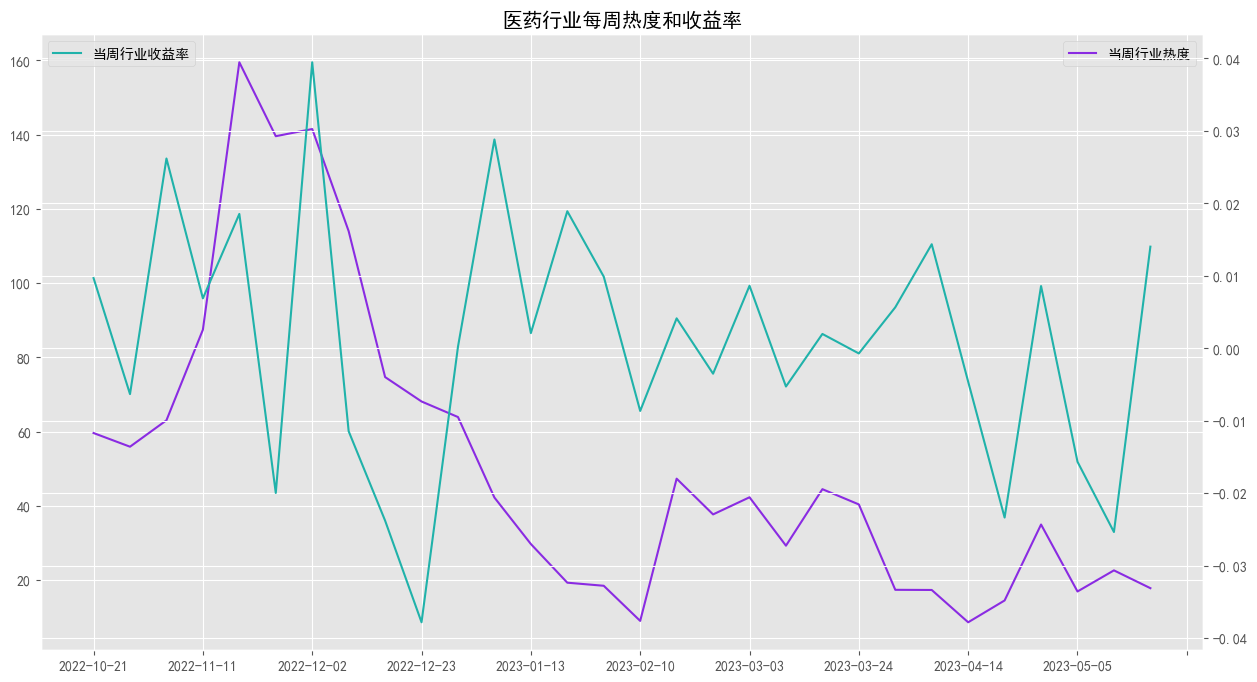

In [39]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)     
tick_spacing = 3
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y1, c = 'blueviolet',linestyle='solid', label = '当周行业热度')

ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(x, y2, c = 'lightseagreen', linestyle='solid',label = '当周行业收益率')
ax2.legend(loc=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title(q+'行业'+ '每周热度和收益率' )
plt.savefig(q+'每周热度和收益率', dpi=300)
plt.show()

In [12]:
f10t5p

['2022-10-14',
 '2022-10-21',
 '2022-10-28',
 '2022-11-04',
 '2022-11-11',
 '2022-11-18',
 '2022-11-25',
 '2022-12-02',
 '2022-12-09',
 '2022-12-16',
 '2022-12-23',
 '2022-12-30',
 '2023-01-06',
 '2023-01-13',
 '2023-01-20',
 '2023-02-03',
 '2023-02-10',
 '2023-02-17',
 '2023-02-24',
 '2023-03-03',
 '2023-03-10',
 '2023-03-17',
 '2023-03-24',
 '2023-03-31',
 '2023-04-07',
 '2023-04-14',
 '2023-04-21',
 '2023-04-28',
 '2023-05-05',
 '2023-05-12',
 '2023-05-19']

In [13]:
f10t5r

[['2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21'],
 ['2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28'],
 ['2022-10-31', '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04'],
 ['2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11'],
 ['2022-11-14', '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18'],
 ['2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24', '2022-11-25'],
 ['2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01', '2022-12-02'],
 ['2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09'],
 ['2022-12-12', '2022-12-13', '2022-12-14', '2022-12-15', '2022-12-16'],
 ['2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22', '2022-12-23'],
 ['2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30'],
 ['2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06'],
 ['2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13'],
 ['2023-01-16', '2023-01-17', '2023-01-18', '2023-01-19', '2023-0

In [14]:
f10t5p = select_days('2022-10-01', '2023-05-20', 'fri', 1)
f10t5r = []
days = DTBS['D']['day']
idx = days.index('2022-10-14') 
for i in range(1,len(f10t5p)):
    id1 = days.index(f10t5p[i-1]) 
    id2 = days.index(f10t5p[i])
    f10t5r.append(days[id1+1:id2+1])
    
yqq = ['能源',
 '制造',
 '投资',
 '新能源',
 '基建',
 '医药',
 '电子',
 '环保',
 '消费',
 '农业',
 '科技',
 '金融']

yqq = ['科技',
 '医药',
 '电子']

yqq = ['医药']

# for q in yqq:
#     print(q)
#     for i in range(1,len(f10t5p)-2):
#         twtrta = []
#         nwtrta = []
#         trtcra = []
#         twpfa = []
#         nwpfa = []
#         nnwpfa = []
#         count = 0
#         for cd in DTBS['A'].keys():

#             if DTBS['B'][cd].__contains__('yqq') and DTBS['B'][cd]['yqq'] == q and DTBS['A'][cd][f10t5p[i-1]]['ia'] == 1 and  DTBS['A'][cd][f10t5p[i]]['ia'] == 1 and  DTBS['A'][cd][f10t5p[i+1]]['ia'] == 1 and DTBS['A'][cd][f10t5p[i+2]]['ia'] == 1:
#                 count += 1
#                 twtrt = 0
#                 nwtrt = 0
#                 twpf = DTBS['A'][cd][f10t5p[i]]['dp']/DTBS['A'][cd][f10t5p[i-1]]['dp'] - 1 
#                 nwpf = DTBS['A'][cd][f10t5p[i+1]]['dp']/DTBS['A'][cd][f10t5p[i]]['dp'] - 1
#                 nnwpf = DTBS['A'][cd][f10t5p[i+2]]['dp']/DTBS['A'][cd][f10t5p[i+1]]['dp'] - 1
#                 for d in f10t5r[i-1]:
#                     twtrt += DTBS['A'][cd][d]['trt']
                    
#                 twtrt /= len(f10t5r[i-1])
                    
                
#                 for d in f10t5r[i]:
#                     nwtrt += DTBS['A'][cd][d]['trt']
                    
#                 nwtrt /= len(f10t5r[i])    
                
#                 trtcr = nwtrt/twtrt - 1
                
                
                
#                 twtrta.append(twtrt)
#                 nwtrta.append(nwtrt)
#                 trtcra.append(trtcr)
#                 twpfa.append(twpf)
#                 nwpfa.append(nwpf)
#                 nnwpfa.append(nnwpf)
                
#         print(f10t5p[i])
#         print('数量',count)
#         print('上周换手率', np.mean(twtrta))
#         print('本周换手率',np.mean(nwtrta))               
#         print('换手率变化',np.mean(trtcra))
#         print('上周收益', np.mean(twpfa))          
        
#         print('本周收益', np.mean(nwpfa))  
#         print('下周收益', np.mean(nnwpfa))          
for q in yqq:
    print(q)
    last = 0
    for i in range(1,len(f10t5p)):
        twtrta = []
        twpfa = []
        count = 0
        
        for cd in DTBS['A'].keys():

            if DTBS['B'][cd].__contains__('yqq') and DTBS['B'][cd]['yqq'] == q and DTBS['A'][cd][f10t5p[i-1]]['ia'] == 1 and  DTBS['A'][cd][f10t5p[i]]['ia'] == 1:
                count += 1
                twtrt = 0
                twpf = DTBS['A'][cd][f10t5p[i]]['dp']/DTBS['A'][cd][f10t5p[i-1]]['dp'] - 1 
                for d in f10t5r[i-1]:
                    twtrt += DTBS['A'][cd][d]['trt']
                    
                twtrt /= len(f10t5r[i-1])
                    
                
                
                twtrta.append(twtrt)
                twpfa.append(twpf)
        this = np.mean(twtrta)
        
        if i >= 2:
            la
            
        last = this

#         print(f10t5p[i])
#         print('数量',count)
#         print('本周换手率', np.mean(twtrta))
#         print('本周收益率',np.mean(twpfa))     

        

